# The purpose of this notebook is to enable the upload feature for Coles Form Recognizer. It showcases the usage of both Byte-type images and URL images as inputs to the Form Recognizer SDK.

# Import Packages & Credential

In [ ]:
# !pip install azure-ai-formrecognizer
# !pip install --upgrade azure-cognitiveservices-vision-computervision
# !pip install azure-ai-textanalytics

In [30]:
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from azure.ai.textanalytics import TextAnalyticsClient

import json
from array import array
import os

import sys
import time
import requests
from requests import get, post

import IPython.display as display
from PIL import Image
import io

In [3]:
endpoint = "https://common-ai-formrecognizer-dev.cognitiveservices.azure.com/"
key = "746c93944e874dbea3f82df7c2046efc"

# For Byte type image data(upload)

In [25]:
path = r"G:\VSCode\Microsoft_project\OpenAI_DREAM_Demo\Retail\Coles-recipy\make-a-list-and-keep-it-organized-1658437408.jpg"

with open(path, "rb") as fd:
    document = fd.read()

In [23]:
type(document)

bytes

## target image

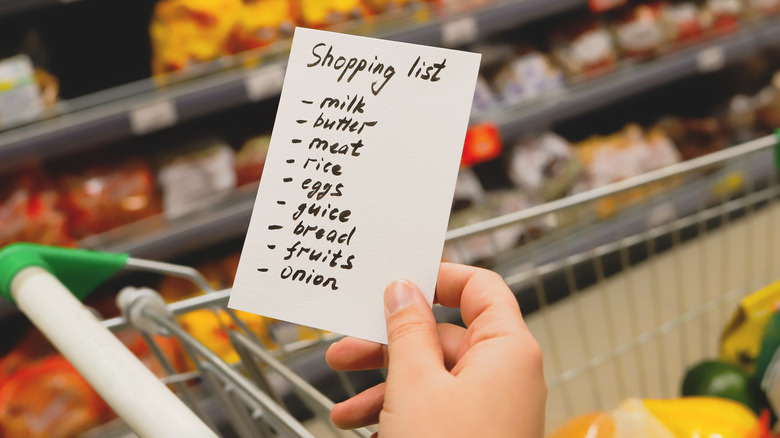

In [31]:
# Create a BytesIO object from the byte array
image_stream = io.BytesIO(document)

# Open the image using PIL (Python Imaging Library)
image = Image.open(image_stream)

# Display the image in the output cell
display.display(image)

In [26]:
credential = AzureKeyCredential(key)
document_analysis_client = DocumentAnalysisClient(endpoint, credential)

# Use the model name
model_id = "prebuilt-read"  


poller = document_analysis_client.begin_analyze_document(model_id=model_id, document=document)
result = poller.result()



# iterate over lines, words, and selection marks on each page of the document
for page in result.pages:
    print("\nLines found on page {}".format(page.page_number))
    for line in page.lines:
        print("...Line '{}'".format(line.content))


Lines found on page 1
...Line 'Shopping list'
...Line '- milk'
...Line '- butter'
...Line '- meat'
...Line '- rice'
...Line '· eggs'
...Line '- guice'
...Line '- bread'
...Line '- fruits'
...Line '- onion'


In [27]:
print(result.content)

Shopping list
- milk - butter - meat
- rice
· eggs
- guice - bread - fruits - onion


# with Url Image

In [28]:
path = 'https://www.tastingtable.com/img/gallery/plan-your-grocery-list-to-make-your-shopping-trip-more-efficient/make-a-list-and-keep-it-organized-1658437408.jpg'
#2. with Url(When path is url)
poller = document_analysis_client.begin_analyze_document_from_url(model_id=model_id, document_url=path)


In [32]:
credential = AzureKeyCredential(key)
document_analysis_client = DocumentAnalysisClient(endpoint, credential)

# Use the model name
model_id = "prebuilt-read"  

poller = document_analysis_client.begin_analyze_document(model_id=model_id, document=document)
result = poller.result()


# iterate over lines, words, and selection marks on each page of the document
for page in result.pages:
    print("\nLines found on page {}".format(page.page_number))
    for line in page.lines:
        print("...Line '{}'".format(line.content))


Lines found on page 1
...Line 'Shopping list'
...Line '- milk'
...Line '- butter'
...Line '- meat'
...Line '- rice'
...Line '· eggs'
...Line '- guice'
...Line '- bread'
...Line '- fruits'
...Line '- onion'


In [ ]:
result.content

In [33]:
print(result.content)

Shopping list
- milk - butter - meat
- rice
· eggs
- guice - bread - fruits - onion


In [ ]:
def cook():
    # Upload the image to ImgBB and get its URL
    format = bg_prompt
    response = openai.ChatCompletion.create(
        engine="gpt-35-turbo",
        messages=[
            {"role": "system", "content": "You are the prompt engineer who generate dalle2 prompt"},
            {"role": "user", "content": f" Please generate a prompt for abstract image using this following colors: {complementary_colors_name}. you must follow this sample format: '{format}'"}, 
        ],
        temperature=0
        )
    text = response['choices'][0]['message']['content']
    return text

# Run openAi to get a cook recipe and direction

In [ ]:
#Note: The openai-python library support for Azure OpenAI is in preview.
import os
import openai
openai.api_type = "azure"
openai.api_base = "https://chatgpttest45.openai.azure.com/"
openai.api_version = "2023-03-15-preview"
openai.api_key = "9dcb9b4900584019ab8f2c23eb8643d7"

response = openai.ChatCompletion.create(
  engine="gpt-35-turbo",
  messages = [{"role":"system","content":"You are an AI assistant that helps people find cook recipes and direction from ingredient data"},{"role":"user","content":"Shopping list\\n- milk - butter - meat\\n- rice\\n· eggs\\n- guice - bread - fruits - onion"},{"role":"assistant","content":"Sure, I can help you with that! Here's a recipe for a classic breakfast dish that uses all the ingredients on your list:\n\nSavory Breakfast Strata\n\nIngredients:\n- 8 slices of bread, cubed\n- 1 pound of ground meat (pork, beef or turkey)\n- 1 onion, chopped\n- 1 cup of mixed fruits (such as blueberries and strawberries)\n- 1/2 cup of milk\n- 4 eggs\n- 2 tablespoons of butter\n- Salt and pepper to taste\n\nShopping List:\n- Bread\n- Ground meat (pork, beef or turkey)\n- Onion\n- Mixed fruits (such as blueberries and strawberries)\n- Milk\n- Eggs\n- Butter\n\nDirections:\n\n1. Preheat your oven to 350°F (180°C).\n2. In a skillet over medium heat, brown the ground meat and chopped onion until the meat is cooked through and the onion is soft.\n3. In a large bowl, whisk together the milk, eggs, salt, and pepper.\n4. Add the cubed bread to the bowl and stir to combine.\n5. Add the cooked meat and onion mixture to the bowl and stir to combine.\n6. Pour the mixture into a greased 9x13 inch baking dish.\n7. Top with the mixed fruits.\n8. Cut the butter into small pieces and sprinkle over the top of the mixture.\n9. Bake for 45-50 minutes, or until the top is golden brown and the center is set.\n10. Allow to cool for a few minutes before serving.\n11. Serve hot and enjoy!\n\nI hope you find this recipe helpful! Let me know if you have any other questions."},{"role":"user","content":f"{result.content}"}],
  temperature=0.7,
  max_tokens=800,
  top_p=0.95,
  frequency_penalty=0,
  presence_penalty=0,
  stop=None)

In [ ]:
print(response['choices'][0]['message']['content'])